# Performing EDA on the California Housing Dataset and building a model to predict the house price

## Loading the data

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np

In [2]:
load_data = fetch_california_housing()

In [3]:
data = pd.DataFrame(load_data.data, columns=load_data.feature_names)

In [4]:
data['target'] = load_data.target

## Analysing the data

In [5]:
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [6]:
data

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [9]:
data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

## Assessing the presence of noise in the data.

In [10]:
data[data.AveOccup <= 0.70]

MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
11849  2.5893       8.0  28.615385   5.487179        27.0  0.692308     39.75   

       Longitude  target  
11849     -121.0    0.83

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='AveRooms', ylabel='Count'>

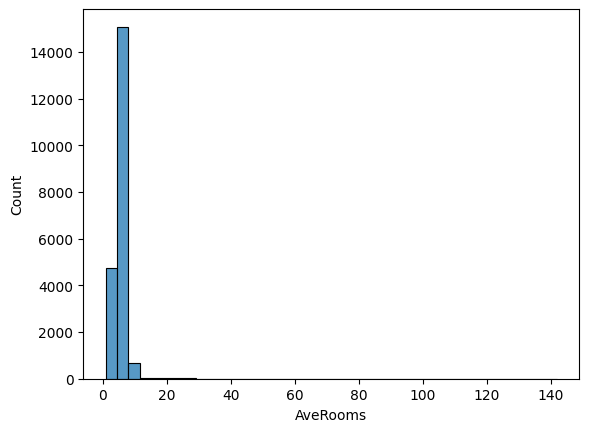

In [12]:
sns.histplot(data=data, x= 'AveRooms', bins=40)

<Axes: xlabel='AveRooms'>

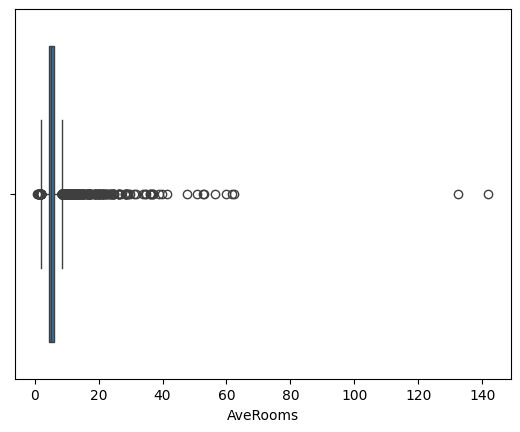

In [13]:
sns.boxplot(data=data, x='AveRooms')

<Axes: xlabel='target', ylabel='AveRooms'>

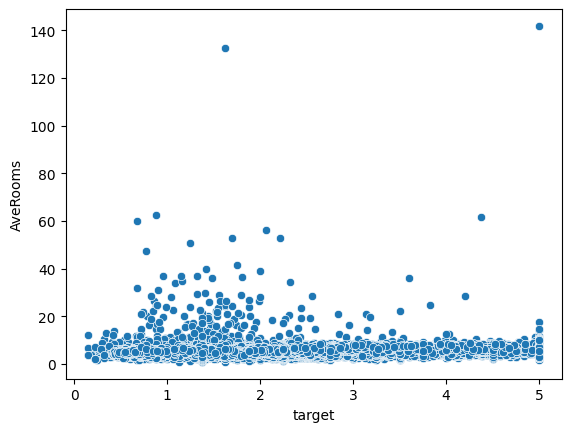

In [14]:
sns.scatterplot(data=data, y="AveRooms", x='target')

## Using pairplot to zero in on the most noisy bits.

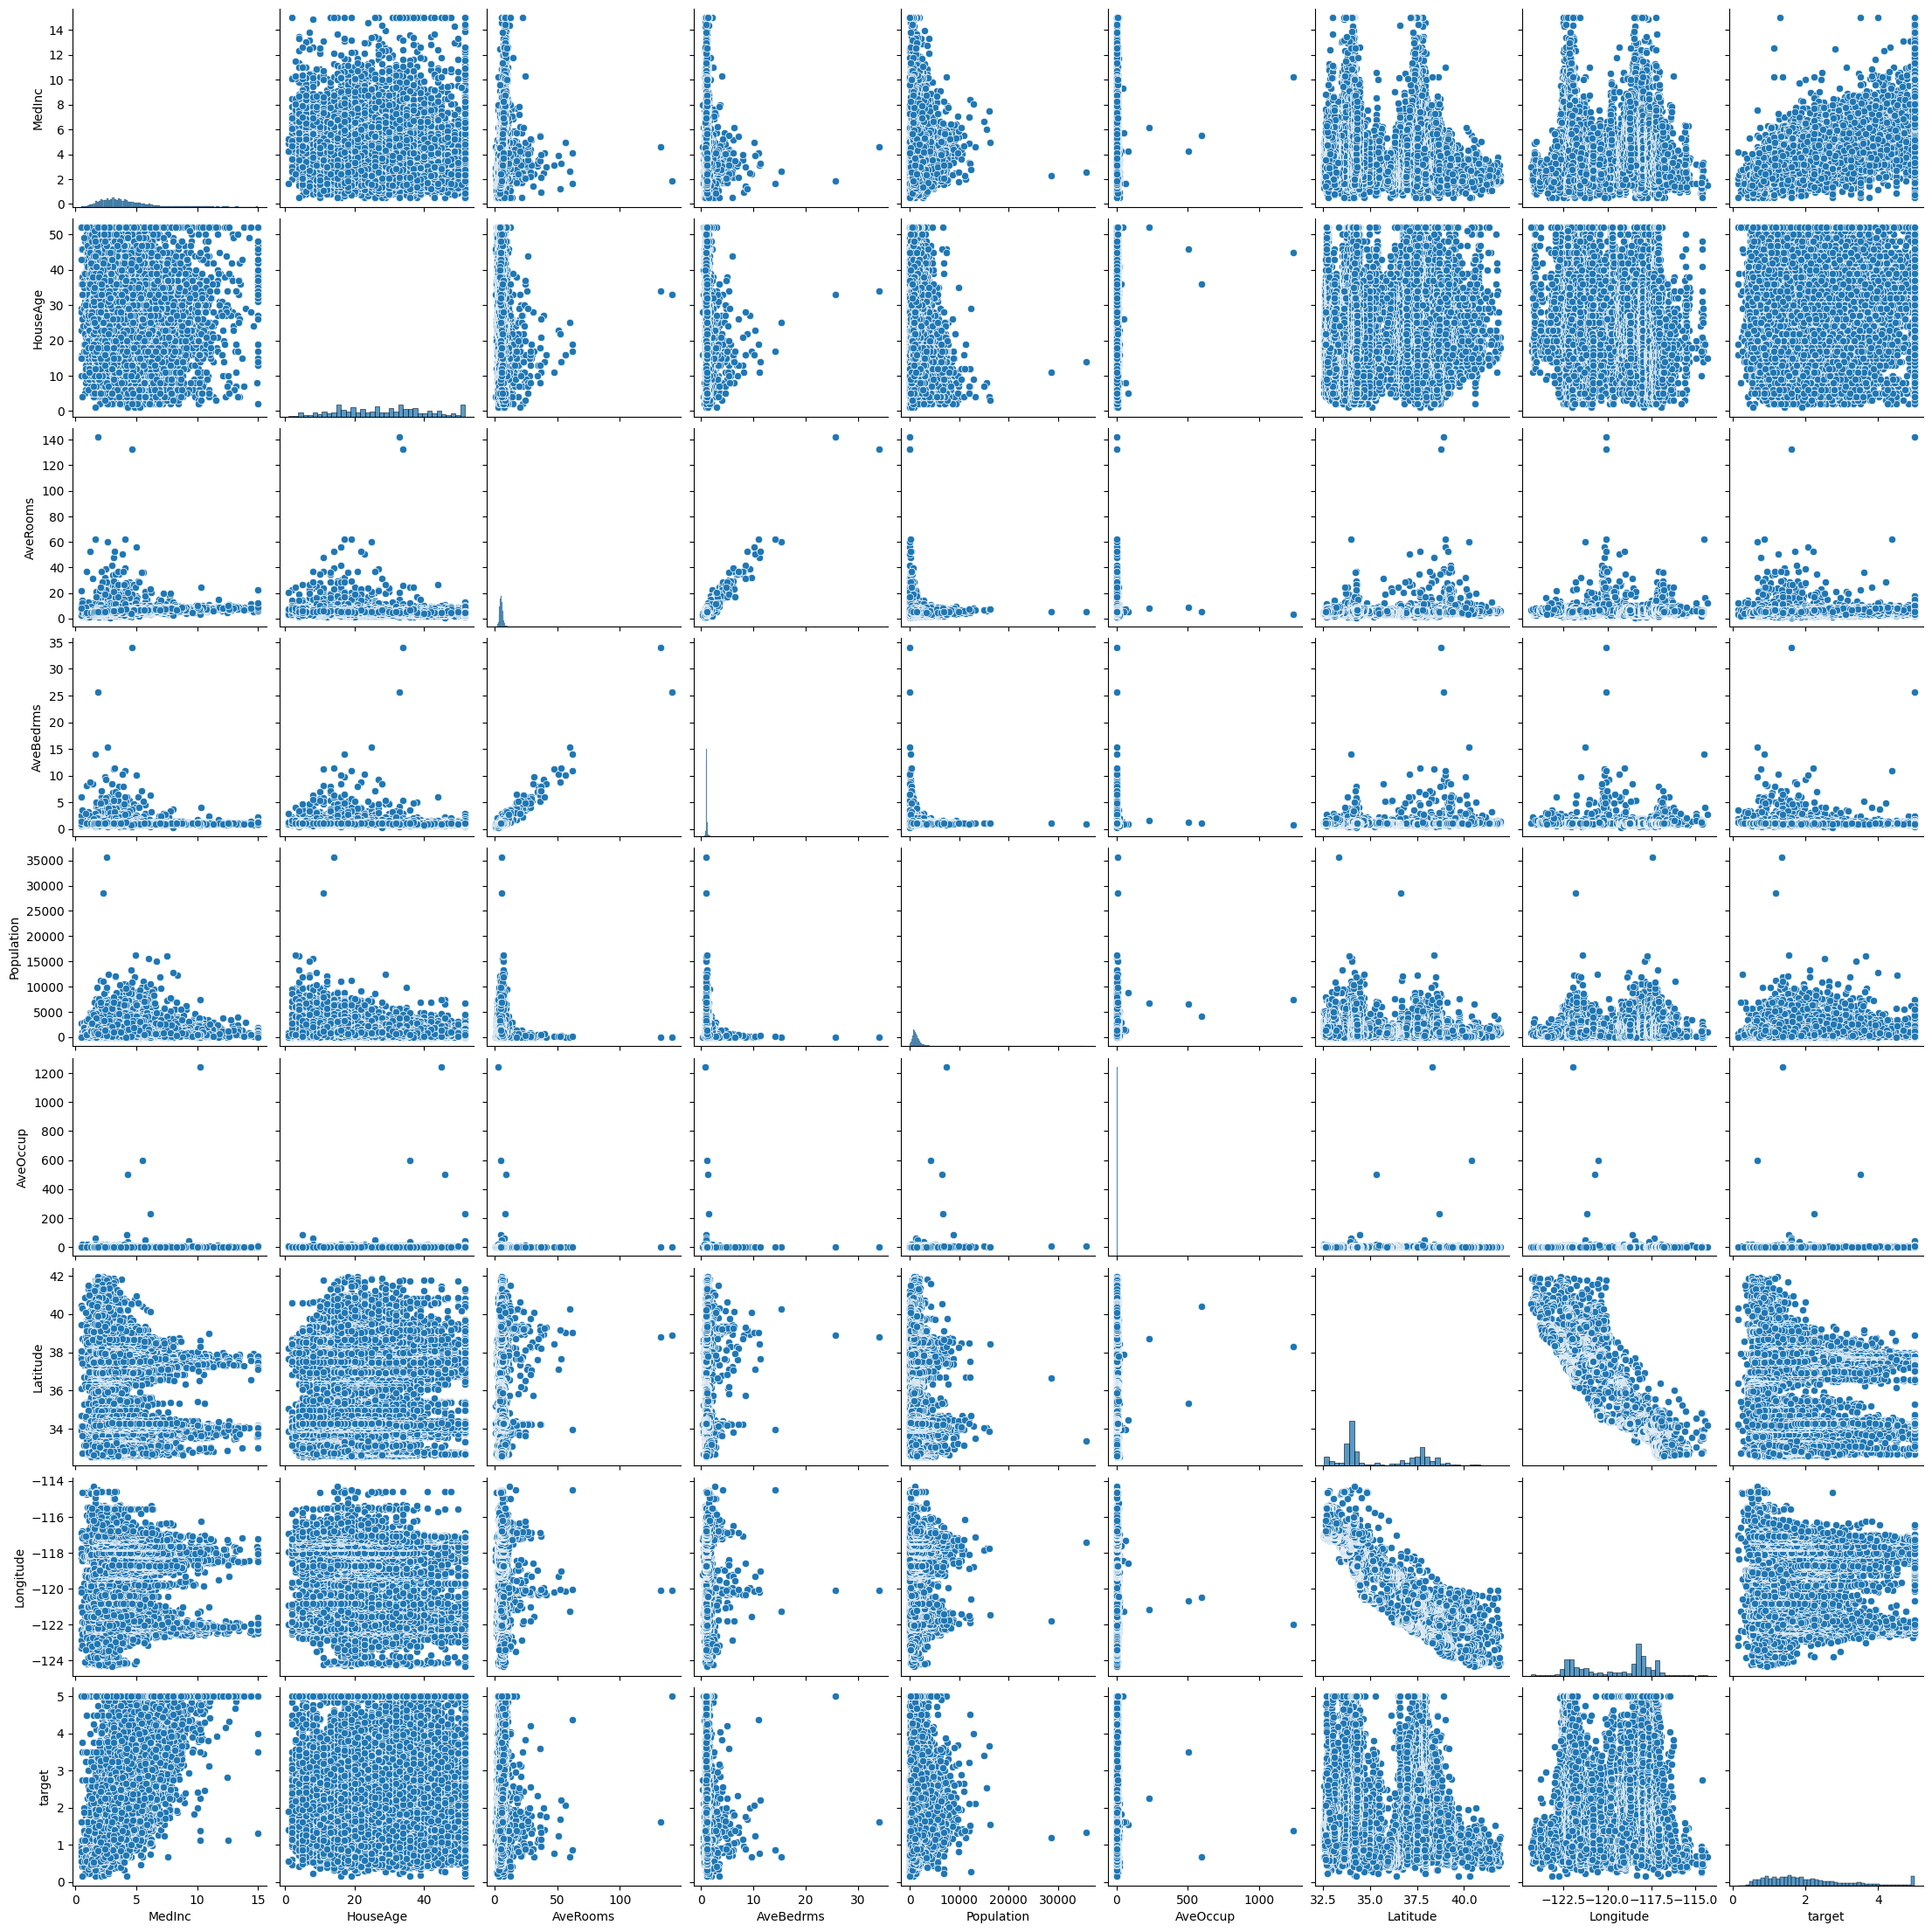

In [15]:
sns.pairplot(data=data)

### Found Average Occupants, Average Rooms and Population features (AveOccup, AveRooms, Population) as the main culprits.

<Axes: xlabel='AveOccup', ylabel='Count'>

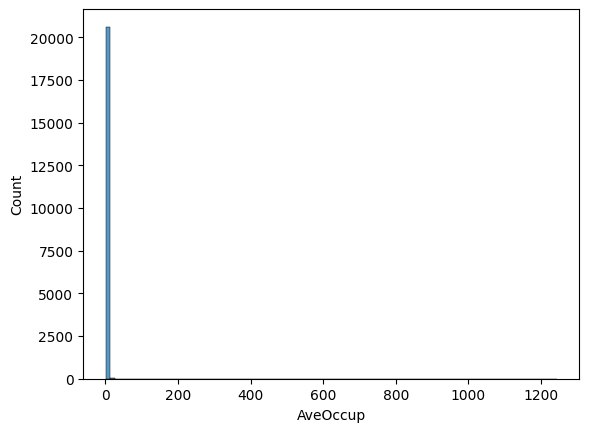

In [16]:
sns.histplot(data=data, x="AveOccup", bins=100)

<Axes: xlabel='AveOccup'>

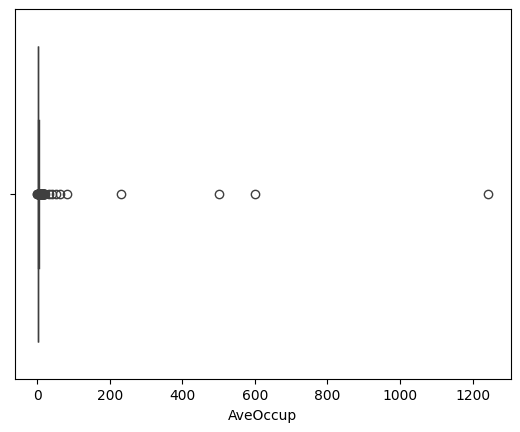

In [17]:
sns.boxplot(data=data, x='AveOccup')

### Performing trials to narrow the thresholds of outliers.

In [18]:
len(data[data['AveOccup'] > 30])

9

In [19]:
len(data[data['AveRooms'] > 40])

11

In [20]:
len(data[data['Population'] > 10000])

23

### Completely dropping the outliers from the data.

In [21]:
data_cleaned = data[data['AveRooms'] <= 40]

In [22]:
data_cleaned = data_cleaned[data_cleaned['AveOccup'] <= 30]

In [23]:
data_cleaned = data_cleaned[data_cleaned['Population'] <= 10000]

In [24]:
data_cleaned['Population'] = np.log(data_cleaned['Population'] + 1)

<Axes: xlabel='Population'>

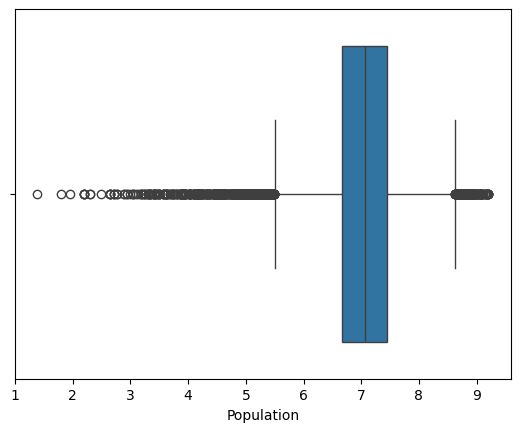

In [25]:
sns.boxplot(data=data_cleaned, x='Population')

In [26]:
data.shape[0]

20640

In [27]:
data_cleaned.shape[0]

20597

<Axes: xlabel='AveOccup'>

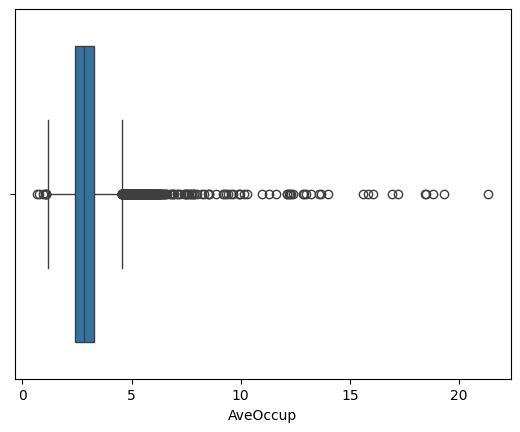

In [28]:
sns.boxplot(data=data_cleaned, x='AveOccup')

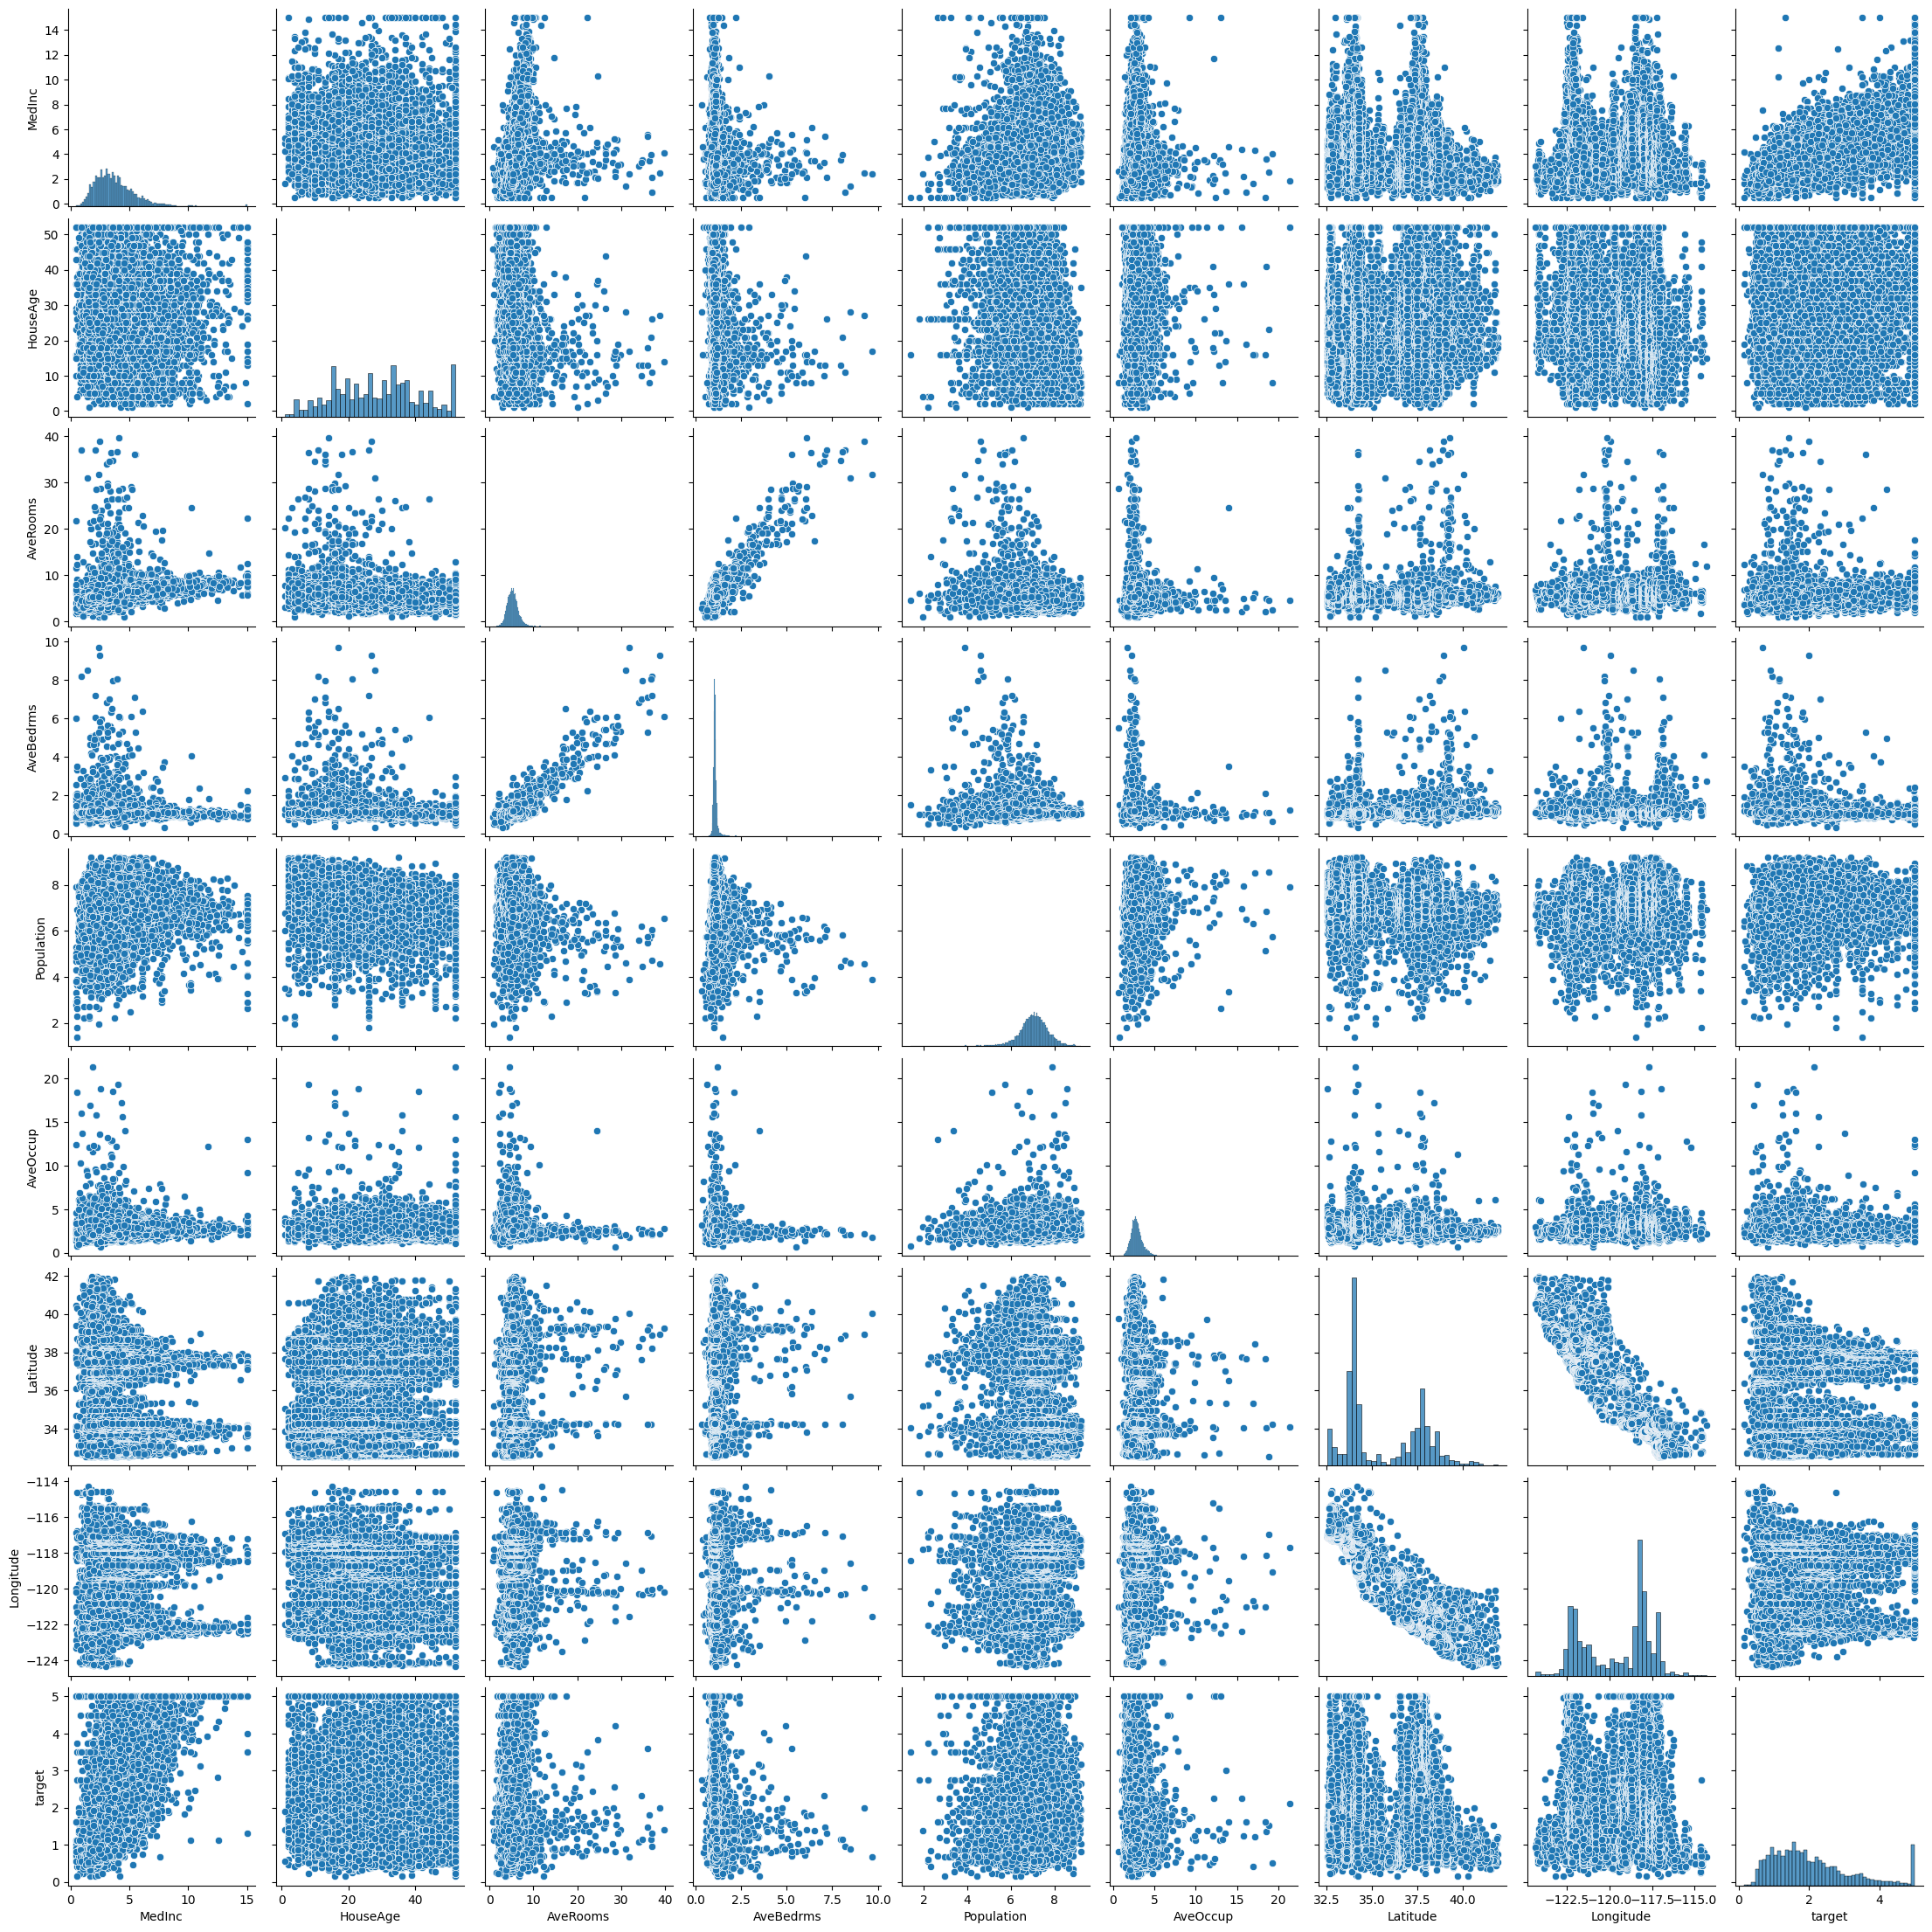

In [29]:
sns.pairplot(data=data_cleaned)

In [30]:
X = data_cleaned.iloc[:, :-1]
y = data_cleaned['target']

### Using Linear Regression for making prediction.

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [32]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model.fit(xtrain, ytrain)

LinearRegression()

In [34]:
ypred = model.predict(xtest)

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(ytest, ypred)

0.6508470490606756

### Utilizing RandomForestRegressor algorithm to get a better model.

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

In [39]:
rf_model.fit(xtrain, ytrain)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [40]:
yprd = rf_model.predict(xtest)

In [41]:
r2_score(ytest, yprd)

0.8138760624833934

In [42]:
importances = rf_model.feature_importances_

In [43]:
feature_names = xtrain.columns

In [44]:
importances_df = pd.Series(importances, index=feature_names)

In [45]:
importances_df

MedInc        0.519435
HouseAge      0.056203
AveRooms      0.044520
AveBedrms     0.028986
Population    0.032056
AveOccup      0.137631
Latitude      0.090709
Longitude     0.090460
dtype: float64

<Axes: xlabel='None', ylabel='None'>

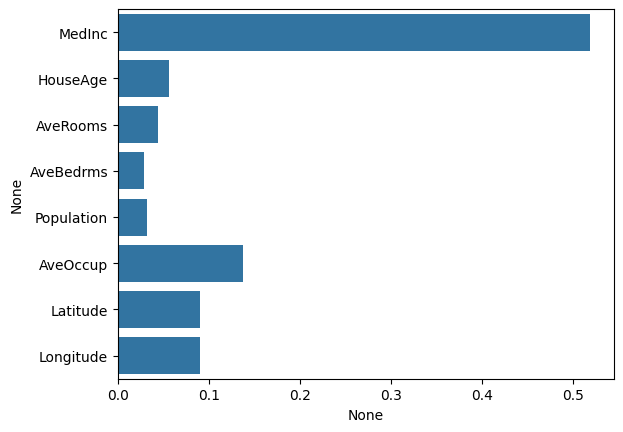

In [46]:
sns.barplot(x=importances_df, y=importances_df.index)

In [47]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [48]:
mae = mean_absolute_error(ytest, yprd)

In [49]:
rmse = root_mean_squared_error(ytest, yprd)

In [50]:
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 0.33253700883495163
RMSE: 0.5031982226434951


### In this project a total of two models were trained to predict the house values in California

A baseline LinearRegression model was first established which achieved a R<sup>2</sup> score of ~0.61. Which shows that although a linear realtionship exists between the features and housing prices, a significant portion is not captured.

To capture the more intricate details, a RandomForestRegression model was then trained on the same data. This model showed a significant boost in the R<sup>2</sup> achieving approximately ~0.81. This significant jump in the score reflects the fact that the relation between the features and the target is non-linear in nature requiring a more complex algorithm such as RandomForest to capture all the little details.

### From the feature importance derived by the RandomForest Algorithm we can see that 'MedInc' (Median Income) is by far the one with the highest impact.

Mean Absolute Error of 0.3325 is achieved, which means that each prediction is off by about $33,250.

Root mean squared error of 0.5032 was achieved meaning the standard error of the model is approximately $50,320. This along with the low MAE score implies that while the model captuers most of the patterns there are some cases where the model is off by bigger margins dragging the RMSE score with it, thereby resulting in a sightly larger RMSE.